In [ ]:
import numpy as np 
import pandas as pd 
import csv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
import datetime as dt
from statsmodels.tsa.api import ExponentialSmoothing

#White Noise: 


Is a series with mean that is constant with time, a variance that is also constant with time, and zero autocorrelation at all lags.

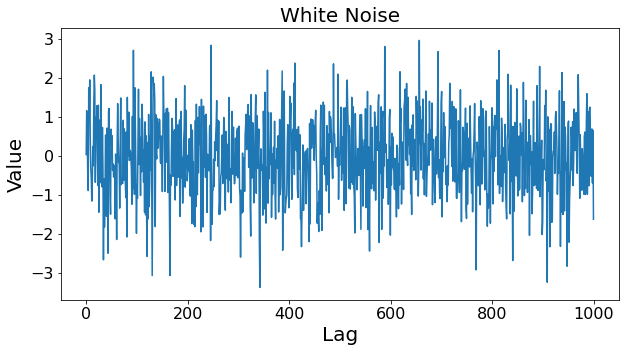

In [ ]:
white_noise = np.random.normal(loc= 0, scale = 1, size = 1000)
plt.plot(white_noise)
plt.title("White Noise", size = 20)
plt.xlabel("Lag",size = 20)
plt.ylabel("Value",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show() 

Autocorrelation function of white noise returns:


Note that as mentioned, there is no auto_correlation among all lags at 95% confidence interval.


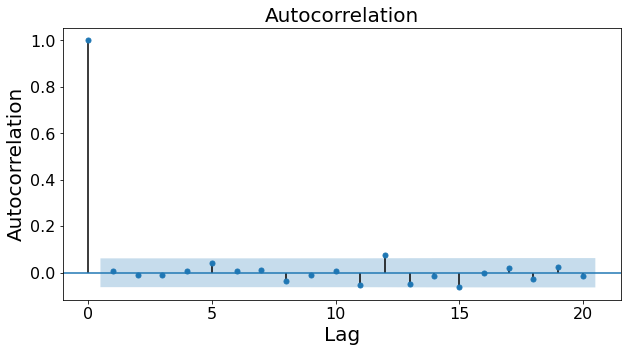

In [ ]:
# Plot autocorrelation function of white noise returns
plot_acf(white_noise, alpha = 0.05,lags=20,title = '')
plt.title("Autocorrelation", size = 20)
plt.xlabel("Lag",size = 20)
plt.ylabel("Autocorrelation",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#Random Walk Models 

Value at time Τ is equal to value at time (Τ - 1) plus some noise. Here is a plot of a simulated random walk.

A random walk is a non-stationary series. The variance grows with time. For example, a stock prices that is a random walk, the variability of prices tomorrow is signioficantly smaller than the variability 20 years from now.

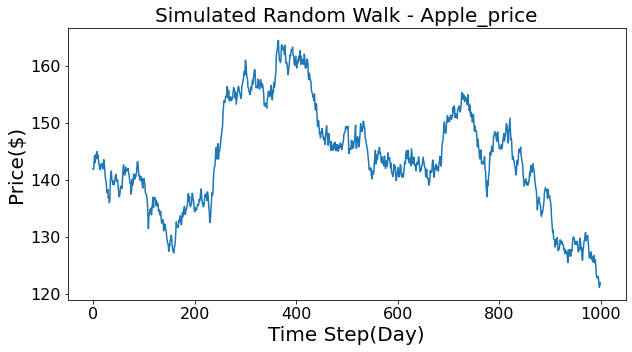

In [ ]:
daily_return = np.random.normal(loc=0, scale=1, size=1000)

# We buy the stock before closing of the market
daily_return[0]=0

# Simulating stock prices of Apple Inc 142 -Todays Price
apple_price = 142 + np.cumsum(daily_return)

# Plot the simulated stock prices
plt.plot(apple_price)
plt.title("Simulated Random Walk - Apple_price",size = 20)
plt.xlabel("Time Step(Day)",size = 20)
plt.ylabel("Price($)",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#Stationarity 

It means that the joint distribution of the observations does not depend on time. 

A less restrictive version of stationarity, and one that is easier to test, is weak stationarity, which means that the observations' mean, variance, and autocorrelations do not depend on time.

The correlation between $X_T$ and $X_{T-τ}$ is only a function of the lag τ, and not a function of $T$.

We can test stationarity by implementing the ADF test.

For a not stationary process, it isn't easy to model the process.

Luckily, many non-stationary series can be made stationary through simple transformations.

###Examples: 

We can take the first difference to remove the linear trend. 

We can take the second difference to remove the quadratic trend. 

We can take differences with a lag corresponding to the periodicity for 
seasonal adjustments.

#Air Passengers (Kaggle Dataset)

In [ ]:
import pandas as pd 
df = pd.read_csv("AirPassengers.csv")
df.columns = ['Date','Number of Passengers'] # Rename the columns
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


##First Look at the Data 

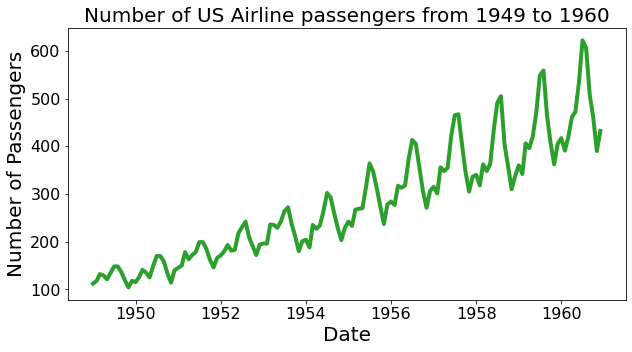

In [ ]:
 plt.plot(np.asarray(df['Date'], dtype='datetime64[s]'), df['Number of Passengers'], color='tab:green',linewidth='4')
 plt.title("Number of US Airline passengers from 1949 to 1960",size = 20)
 plt.xlabel("Date",size = 20)
 plt.xticks(fontsize=16)
 plt.yticks(fontsize=16)
 plt.ylabel("Number of Passengers",size = 20)
 plt.show()

##Example of Mean Model

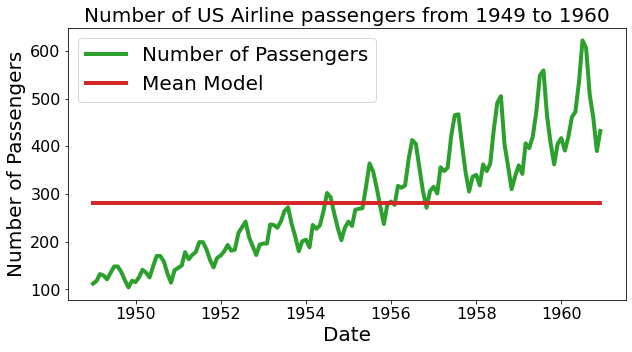

In [ ]:
Mean_Model = np.zeros(len(df['Number of Passengers']))+np.mean(df['Number of Passengers'])
plt.plot(np.asarray(df['Date'], dtype='datetime64[s]'), df['Number of Passengers'], color='tab:green',linewidth='4')
plt.plot(np.asarray(df['Date'], dtype='datetime64[s]'), Mean_Model, color='tab:red',linewidth='4')
plt.title("Number of US Airline passengers from 1949 to 1960",size = 20)
plt.xlabel("Date",size = 20)
plt.ylabel("Number of Passengers",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["Number of Passengers", "Mean Model"],prop={'size': 20})
plt.show()

##Example of Linear trend Model

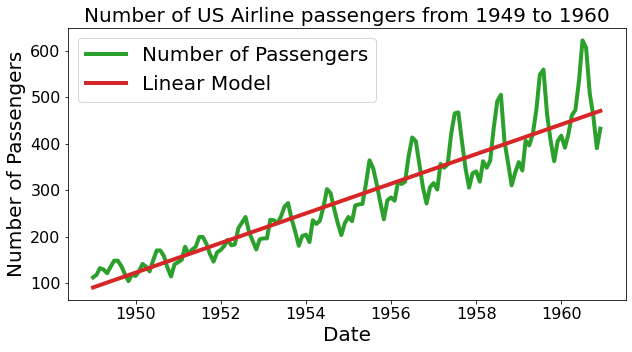

In [ ]:
df_temp = df.copy()
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
df_temp['Date']=df_temp['Date'].map(dt.datetime.toordinal)
X = df_temp['Date'].values
X= X.reshape(-1, 1)
Y = df['Number of Passengers'].values
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)
plt.plot(np.asarray(df['Date'], dtype='datetime64[s]'), df['Number of Passengers'], color='tab:green',linewidth='4')
plt.plot(np.asarray(df['Date'], dtype='datetime64[s]'), Y_pred, color='tab:red',linewidth='4')
plt.title("Number of US Airline passengers from 1949 to 1960",size = 20)
plt.xlabel("Date",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Number of Passengers",size = 20)
plt.legend(["Number of Passengers", "Linear Model"],prop={'size': 20})
plt.show()

##Example of Random Walk Model

In [ ]:
Monthly_steps = np.random.normal(loc=0, scale=60, size=len(df['Number of Passengers']))
Monthly_steps[0]=0
Random_Walk = df['Number of Passengers'][0]+ np.cumsum(Monthly_steps)


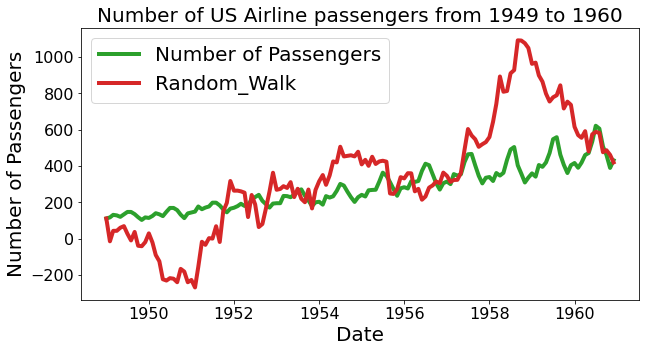

In [ ]:
plt.plot(np.asarray(df['Date'], dtype='datetime64[s]'), df['Number of Passengers'], color='tab:green',linewidth='4')
plt.plot(np.asarray(df['Date'], dtype='datetime64[s]'), Random_Walk, color='tab:red',linewidth='4')
plt.title("Number of US Airline passengers from 1949 to 1960",size = 20)
plt.xlabel("Date",size = 20)
plt.ylabel("Number of Passengers",size = 20)
plt.legend(["Number of Passengers", "Random_Walk"],prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#Paterns in Airline Passengers Time Series:

##Trend:

A trend is observed when there is an increasing or decreasing slope observed in the time series.

##Seasonality:

A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

##Cyclic behaviour
Another important thing to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## Airline Passengers Time Series Decomposition :

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative',period = 12)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive',period = 12)


##Multiplicative Decomposition

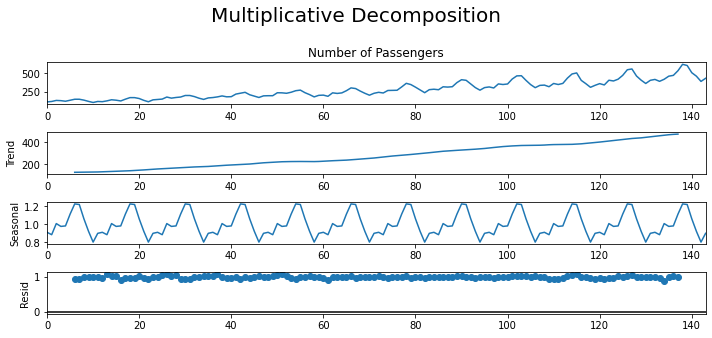

In [ ]:
# Plot
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=20)
plt.tight_layout(rect=[0, 0.05, 1, 0.9])
plt.show()

##Observations (Multiplicative Decomposition)

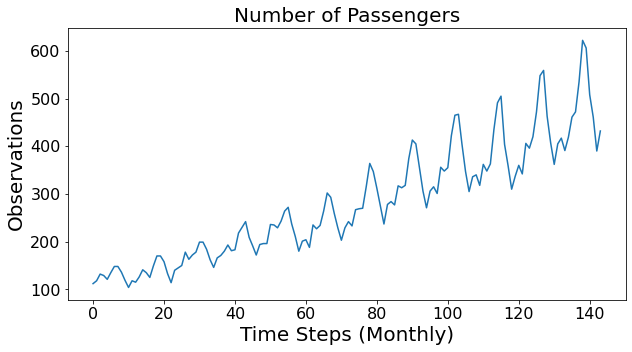

In [ ]:
multiplicative_decomposition.observed.plot()
plt.title("Number of Passengers",size = 20)
plt.xlabel("Time Steps (Monthly)",size = 20)
plt.ylabel("Observations",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##Trend (Multiplicative Decomposition)

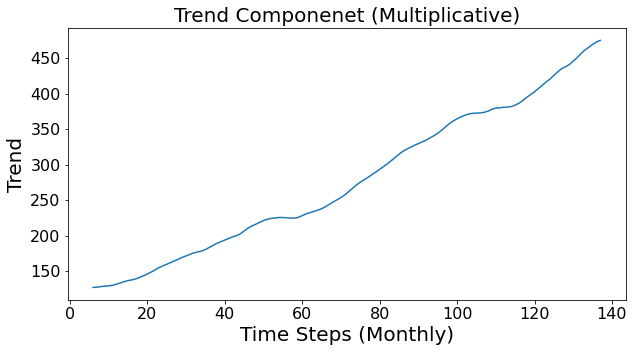

In [ ]:
multiplicative_decomposition.trend.plot()
plt.title("Trend Componenet (Multiplicative)",size = 20)
plt.xlabel("Time Steps (Monthly)",size = 20)
plt.ylabel("Trend",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##Seasonality (Multiplicative Decomposition)

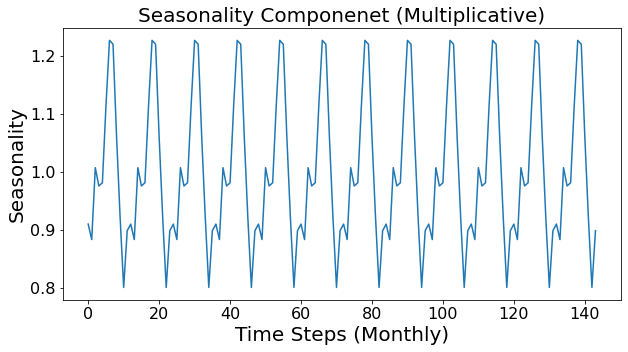

In [ ]:
multiplicative_decomposition.seasonal.plot()
plt.title("Seasonality Componenet (Multiplicative)",size = 20)
plt.xlabel("Time Steps (Monthly)",size = 20)
plt.ylabel("Seasonality",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##Residual (Multiplicative Decomposition)

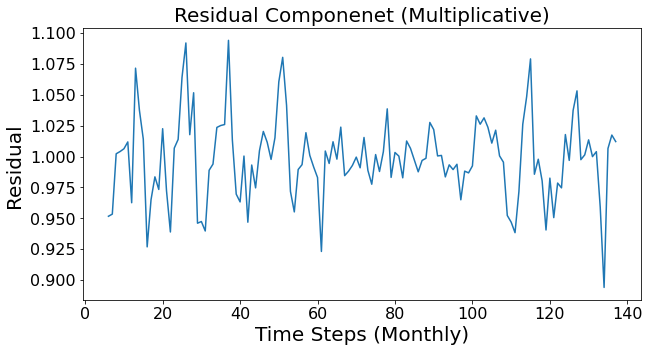

In [ ]:
multiplicative_decomposition.resid.plot()
plt.title("Residual Componenet (Multiplicative)",size = 20)
plt.xlabel("Time Steps (Monthly)",size = 20)
plt.ylabel("Residual ",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#Additive Decomposition

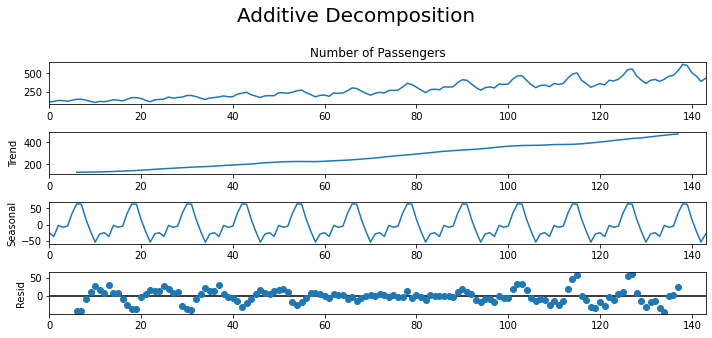

In [ ]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=20)
plt.tight_layout(rect=[0, 0.05, 1, 0.9])
plt.show()

##Observations (Additive Decomposition)

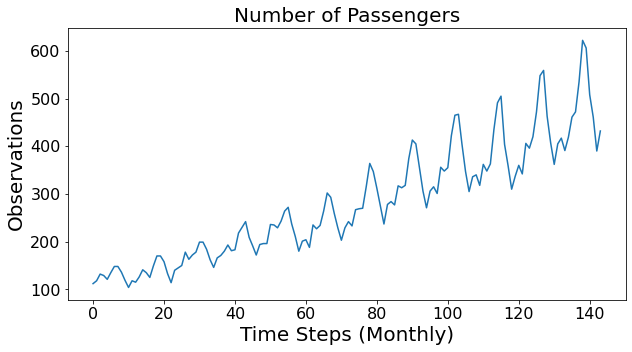

In [ ]:
additive_decomposition.observed.plot()
plt.title("Number of Passengers",size = 20)
plt.xlabel("Time Steps (Monthly)",size = 20)
plt.ylabel("Observations",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##Trend (Additive Decomposition)

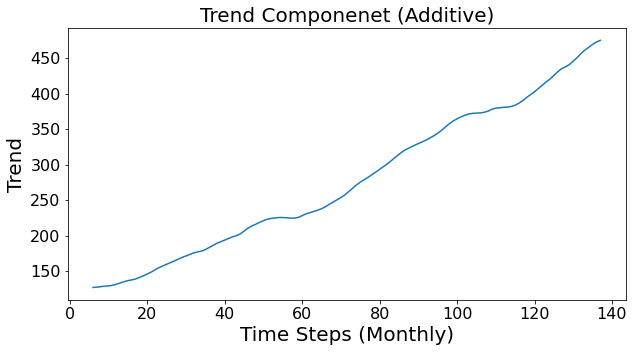

In [ ]:
additive_decomposition.trend.plot()
plt.title("Trend Componenet (Additive)",size = 20)
plt.xlabel("Time Steps (Monthly)",size = 20)
plt.ylabel("Trend",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##Seasonality (Additive Decomposition)

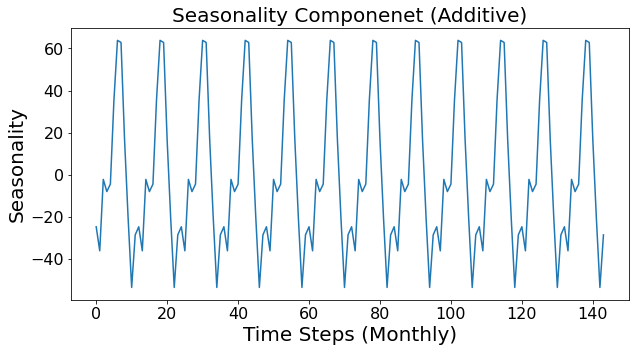

In [ ]:
additive_decomposition.seasonal.plot()
plt.title("Seasonality Componenet (Additive)",size = 20)
plt.xlabel("Time Steps (Monthly)",size = 20)
plt.ylabel("Seasonality",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##Residual (Additive Decomposition)

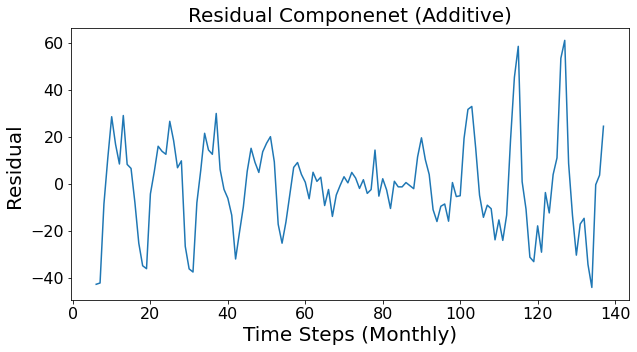

In [ ]:
additive_decomposition.resid.plot()
plt.title("Residual Componenet (Additive)",size = 20)
plt.xlabel("Time Steps (Monthly)",size = 20)
plt.ylabel("Residual ",size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#Augmented Dickey-Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
ADF_stat = adfuller(additive_decomposition.resid.dropna().values, autolag='AIC')
print(f'\np-value: {ADF_stat[1]}')
print("Non-Stationary") if ADF_stat[1] > 0.05 else print("Stationary")


p-value: 5.516868902226193e-06
Stationary


In [ ]:
from statsmodels.tsa.stattools import adfuller
ADF_stat = adfuller(additive_decomposition.observed.dropna().values, autolag='AIC')
print(f'\np-value: {ADF_stat[1]}')
print("Non-Stationary") if ADF_stat[1] > 0.05 else print("Stationary")


p-value: 0.991880243437641
Non-Stationary


#Steps to Take to Model a Given Time series

You won’t be able to spot any particular model by looking at this plot, but you will be able to see the need for various possible actions.
If there’s an obvious upward or downward linear trend, a first difference may be needed. A quadratic trend might need a 2nd order difference (as described above). We rarely want to go much beyond two. In those cases, we might want to think about things like smoothing, which we will cover later in the course. Over-differencing can cause us to introduce unnecessary levels of dependency (difference white noise to obtain an MA(1)–difference again to obtain an MA(2), etc.)
For data with a curved upward trend accompanied by increasing variance, you should consider transforming the series with either a logarithm or a square root."

#Smoothing Data with Exponential Smoothing Model

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


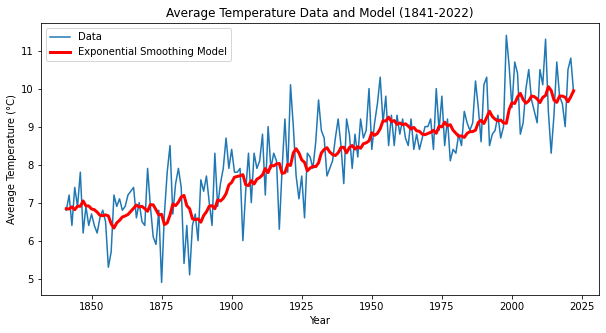

In [ ]:
#import necessary libraries 

#read data from the provided excel file
data = pd.read_excel('temperature.xlsx', index_col=[0])

#apply the smoothing model
fit = ExponentialSmoothing(data,seasonal_periods=4).fit(use_boxcox=True)

#plot the original data and the fitted exponential model together
plt.figure(figsize=(10,5))
plt.plot(data, label='Data')
plt.plot(fit.fittedvalues, color='red', label='Exponential Smoothing Model', linewidth=3)
plt.title('Average Temperature Data and Model (1841-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(loc='best')
plt.show()

#Forcasting with Exponential Smoothing Model

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


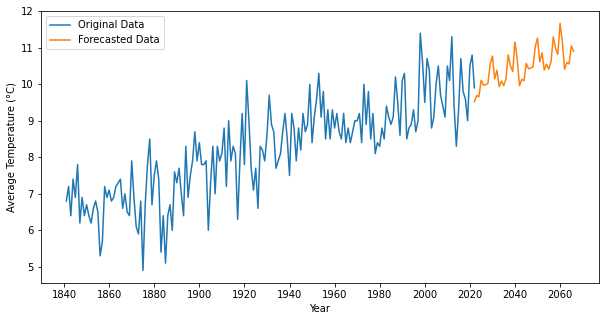

In [ ]:
df = pd.read_excel('temperature.xlsx')

# Define dataframe for forecasting
df_forecast = pd.DataFrame(df['Year'].astype(int))
df_forecast['Temperature'] = df['Temperature']

# Fit Exponential Smoothing Model
# Change the seasonal_periods to arbitrary numbers, observe the changes on the plot, and have fun!
model = ExponentialSmoothing(df_forecast['Temperature'], trend = 'mul', seasonal = 'mul', seasonal_periods = 20).fit()

# Predict data
N= 45 # Number of years to forcast
forecast_data = model.forecast(N).rename('Forecast')

# Plotting the original data and forecasted data
plt.figure(figsize=(10,5))
plt.plot(df_forecast['Year'], df_forecast['Temperature'], label = 'Original Data')
plt.plot(range(df_forecast.iloc[-1,0],df_forecast.iloc[-1,0]+N), forecast_data, label = 'Forecasted Data')
plt.xticks(range(df_forecast.iloc[0,0]-1,df_forecast.iloc[-1,0]-1+N,20))
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

#Smoothing with Moving Average

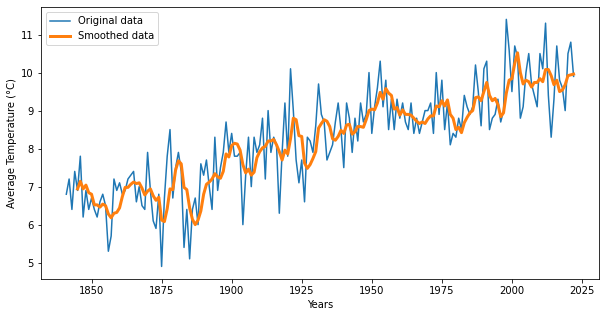

In [ ]:
# Create a list for the years
year = df['Year']

# Create a list for the average temperatures
temperatures = df['Temperature']

# Calculate the 5-year moving average
moving_average = pd.Series(temperatures).rolling(window=5).mean()

# Plot the original data and the smoothed data
plt.figure(figsize=(10,5))
plt.plot(year, temperatures, label = 'Original data')
plt.plot(year, moving_average, label = 'Smoothed data', linewidth=3)
plt.xlabel('Years')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

#Forcasting with Moving Average Model

This code first calculates the past forecast errors by subtracting each temperature value from the previous temperature value. The moving average model is then fit using the past forecast errors, by calculating the mean of the last error using the rolling method. Finally, the forecast for the next 20 years is generated by adding the last error to the last forecasted temperature. The original and forecasted data are plotted in a single figure using the matplotlib library. To change the order of the moving average model in the code, you need to modify the window size used in the rolling method. 

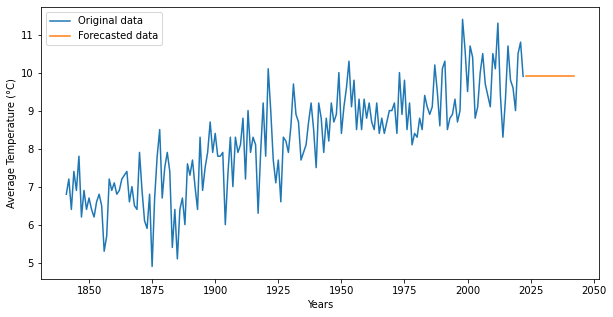

In [ ]:
# Create a list for the forecasted years
future_years = np.arange(2023, 2043)

# Calculate the 3-year simple moving average
w = 1 # Order of MA model (# past forecast errors to use)
moving_average = pd.Series(temperatures).rolling(window=w).mean()

# Calculate the forecasted average temperature for the next 20 years
forecasted_temperatures = moving_average.iloc[-1]

# Create a list to store the forecasted temperatures
f_temperatures = []

# Calculate the forecasted average temperature for the next 20 years
for i in range(0,20):
    forecasted_temperature = moving_average.iloc[-1]
    f_temperatures.append(forecasted_temperature)
    moving_average = pd.Series(temperatures).rolling(window=w).mean()

# Plot the original data and the forecasted data
plt.figure(figsize=(10,5))
plt.plot(year, temperatures, label = 'Original data')
plt.plot(future_years, f_temperatures, label = 'Forecasted data')
plt.xlabel('Years')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

#Forcasting with ARMA model

This code fits an ARMA model with order (3, 1), which means it uses the last 3 values of the time series and the last 1 forecast errors to make predictions. You can modify the order of the ARMA model by changing the order parameter in the ARMA function. You can choose the best order for your data using techniques such as cross-validation or the Akaike Information Criterion (AIC).

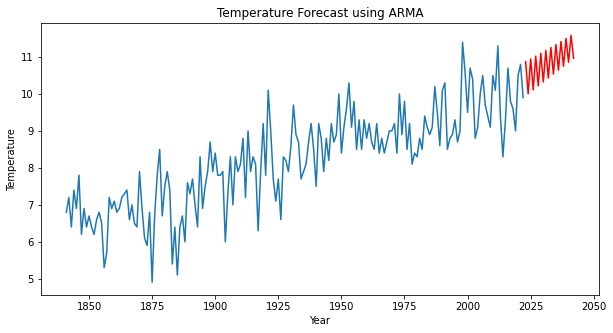

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARMA
# Fit the ARMA model
model = ARMA(df['Temperature'], order=(3, 1))
result = model.fit()

# Make predictions for the next 20 years
forecast = result.predict(start=df.index[-1] + 1, end=df.index[-1] + 20)

# Create a new DataFrame to store the forecasted data
forecast_df = pd.DataFrame({'Year': range(2023, 2043), 'Temperature': forecast})

# Concatenate the original and forecasted data
result = pd.concat([df, forecast_df])

# Plot the original data in black
plt.figure(figsize=(10,5))
plt.plot(df['Year'], df['Temperature'])

# Plot the forecasted data in red
plt.plot(forecast_df['Year'], forecast_df['Temperature'], 'r-')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Forecast using ARMA')
plt.show()

#Forcasting with ARIMA model

This code fits an ARIMA model with order (5, 2, 3)

5 is the order (number of time steps) for the autoregressive (AR) term

2 is the order of differencing to make the time series stationary

3 is the order (number of time steps) for the moving average (MA) term

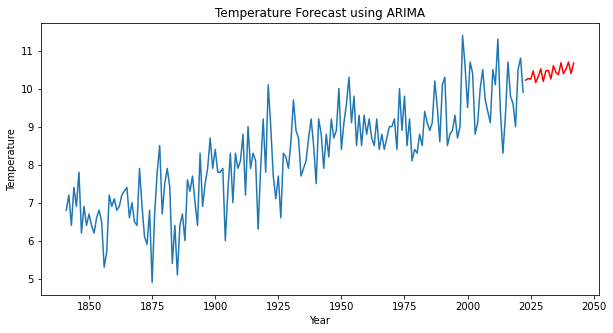

In [ ]:
# Fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Temperature'], order=(5, 2, 3))
result = model.fit()

# Make predictions for the next 20 years
forecast = result.predict(start=df.index[-1] + 1, end=df.index[-1] + 20)

# Create a new DataFrame to store the forecasted data
forecast_df = pd.DataFrame({'Year': range(2023, 2043), 'Temperature': forecast})

# Concatenate the original and forecasted data
result = pd.concat([df, forecast_df])

# Plot the original data
plt.figure(figsize=(10,5))

plt.plot(df['Year'], df['Temperature'])

# Plot the forecasted data in red
plt.plot(forecast_df['Year'], forecast_df['Temperature'], 'r-')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Forecast using ARIMA')
plt.show()

##Forcasting with SARIMA model

This code fits an SARIMA model with order (1, 1, 1, 12), which specifies an SARIMA model with 1st-order seasonal differencing, 1 seasonal autoregressive term, 1 seasonal moving average term, and 3 moving average terms. 12 is the number of seasons (i.e., 12 months in a year)

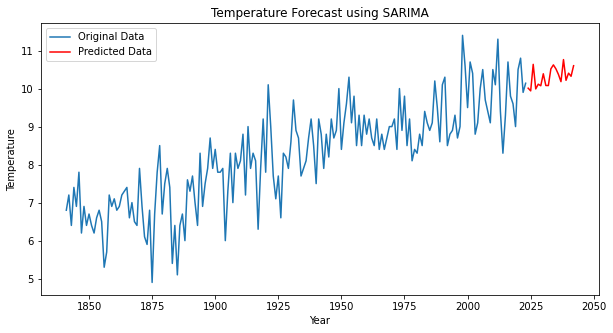

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(df['Temperature'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# Make predictions for the next 20 years
forecast = result.predict(start=df.index[-1] + 1, end=df.index[-1] + 20, dynamic=False)

# Create a new DataFrame to store the forecasted data
forecast_df = pd.DataFrame({'Year': range(2023, 2043), 'Temperature': forecast})

# Concatenate the original and forecasted data
result = pd.concat([df, forecast_df])

# Plot the original and forecasted data
plt.figure(figsize=(10,5))
plt.plot(result['Year'][:183], result['Temperature'][:183], label='Original Data')
plt.plot(result['Year'][183:], result['Temperature'][183:], 'r-', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Forecast using SARIMA')
plt.legend()
plt.show()

#Creating Time Series Dataset with Conditional Variance

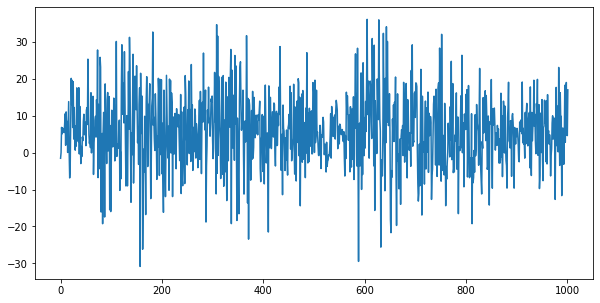

In [ ]:
np.random.seed(10)
vol=[np.random.normal(0,1),np.random.normal(0,1)]
series=[np.random.normal(0,1),np.random.normal(0,1)]
for i in range(0,1000):
  vol_=np.sqrt(0.6+0.08*(series[-2]**2)  +0.52*(vol[-1]**2)+0.38*(vol[-2]**2))
  series_=6+(np.random.normal(0,1))*vol_

  vol.append(vol_)
  series.append(series_)
plt.plot(series)
plt.show()

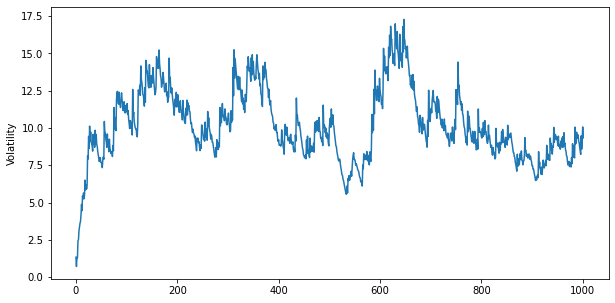

In [ ]:
# Plotting True Volatility
plt.plot(vol)
plt.ylabel('Volatility')
plt.show()

#Partial Autocorrelation Plot

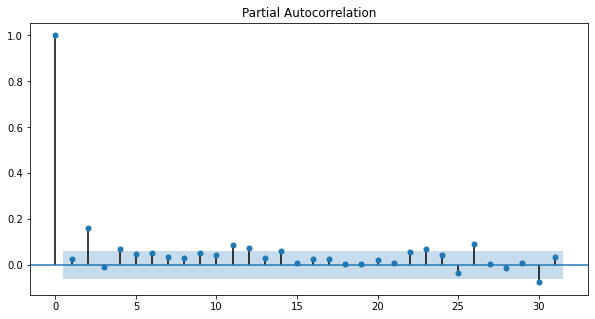

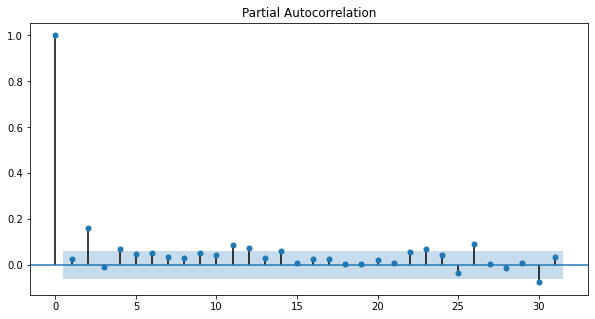

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(np.array(series)**2)

#Arch and Garch Models:

In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 13.8 MB/s eta 0:00:00


In [ ]:
from arch import arch_model
Train,Test=series[:-100],series[-100:]

#Model Fitting with Arch and Garch model 

In [ ]:
#Fitting data to ARCH as well as GARCH Models
arch1_model=arch_model(Train,mean='Constant',vol='ARCH',p=2)
model_arch=arch1_model.fit(disp='off')
garch1_model=arch_model(Train,mean='Constant',vol='GARCH',p=1,q=2)
model_garch=garch1_model.fit(disp='off')

In [ ]:
# Making predictions of Variance from both ARCH and GARCH models 
pred_arch=model_arch.forecast(horizon=50,reindex=False)
pred_garch=model_garch.forecast(horizon=50,reindex=False)

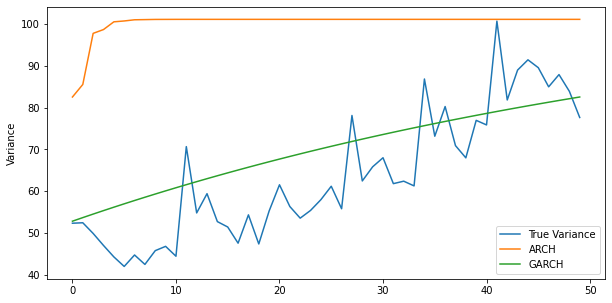

In [ ]:
plt.plot(np.array(vol[-100:-50])**2,label='True Variance')
plt.plot((pred_arch.variance.values[-1, :]),label='ARCH')
plt.plot((pred_garch.variance.values[-1, :]),label='GARCH')
plt.legend(loc='lower right')
plt.ylabel('Variance')
plt.show()

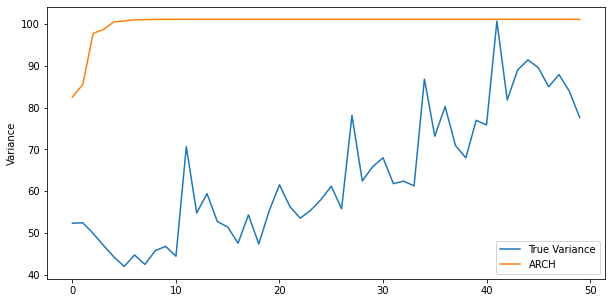

In [ ]:
plt.plot(np.array(vol[-100:-50])**2,label='True Variance')

plt.plot((pred_arch.variance.values[-1, :]),label='ARCH')

plt.legend(loc='lower right')
plt.ylabel('Variance')
plt.show()

#References

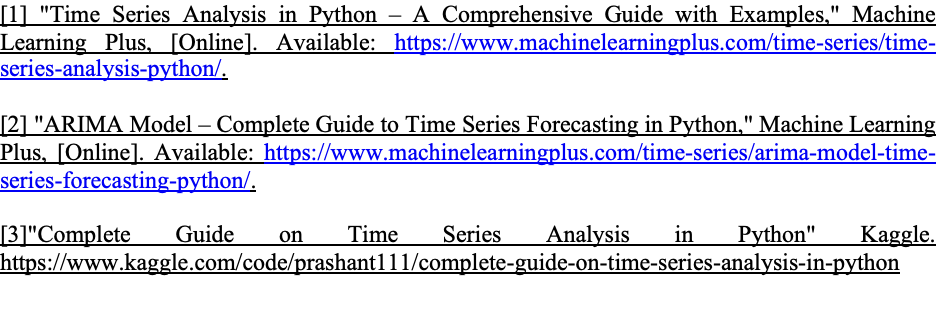